# Tourist Data Visualization
---
## 1. 시계열 그래프 그리기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


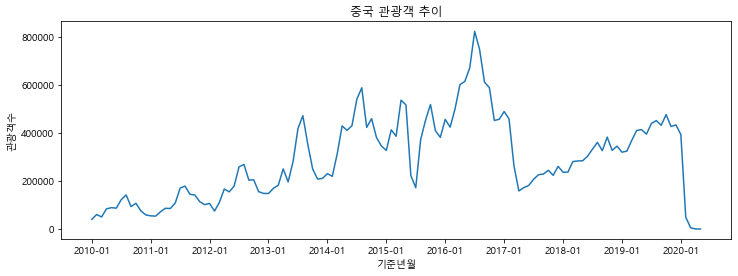

In [3]:
# 중국 그래프 그리기
condition=(df['국적']=='중국')
df_filter=df[condition]

plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(12,4))
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
#x축 눈금 설정
plt.xticks([str(x)+'-01' for x in np.arange(2010,2021)])
plt.show()

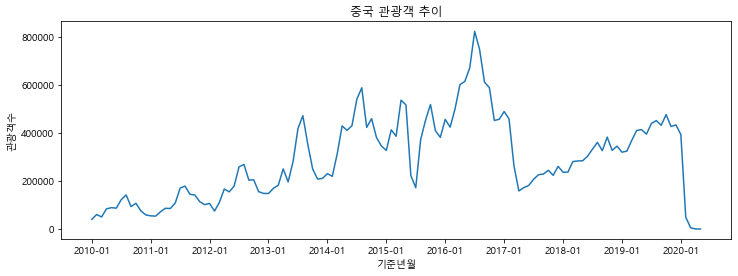

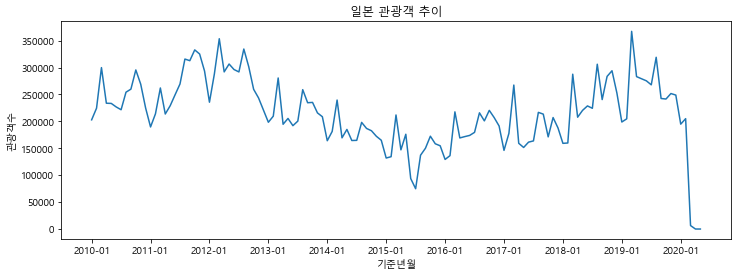

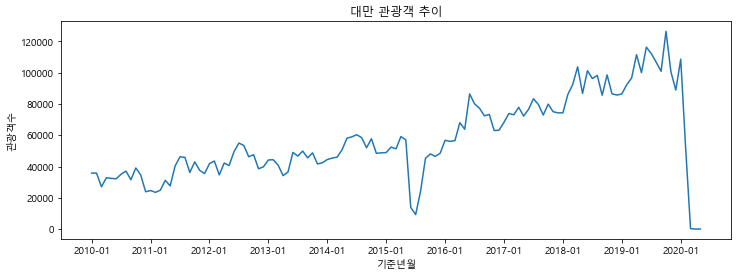

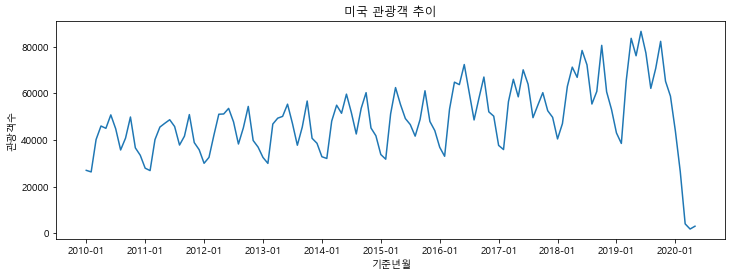

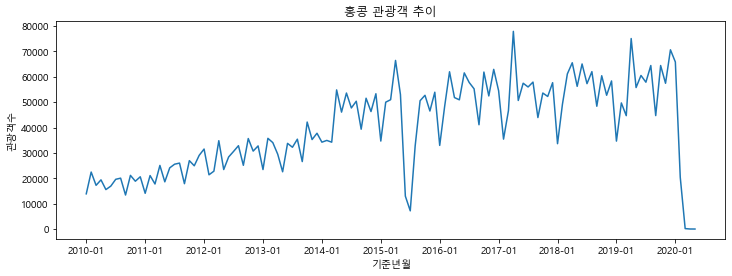

In [4]:
#관광객 상위 5개나라 그래프 그리기
cnt_list=['중국','일본','대만','미국','홍콩']
for cnt in cnt_list:
    condition=(df['국적']==cnt)
    df_filter=df[condition]

    plt.rcParams['font.family']='Malgun Gothic'
    plt.figure(figsize=(12,4))
    plt.plot(df_filter['기준년월'],df_filter['관광'])
    plt.title(cnt+' 관광객 추이')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks([str(x)+'-01' for x in np.arange(2010,2021)])
    plt.show()


---
## 2. 히트맵 그래프 그리기

In [5]:
df['년도']=df['기준년월'].str.slice(0,4)
df['월']=df['기준년월'].str.slice(5,7)
condition=(df['국적']=='중국')
df_filter=df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2,2020,04


In [6]:
df_pivot=df_filter.pivot_table(values='관광',
                              index='년도',
                              columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

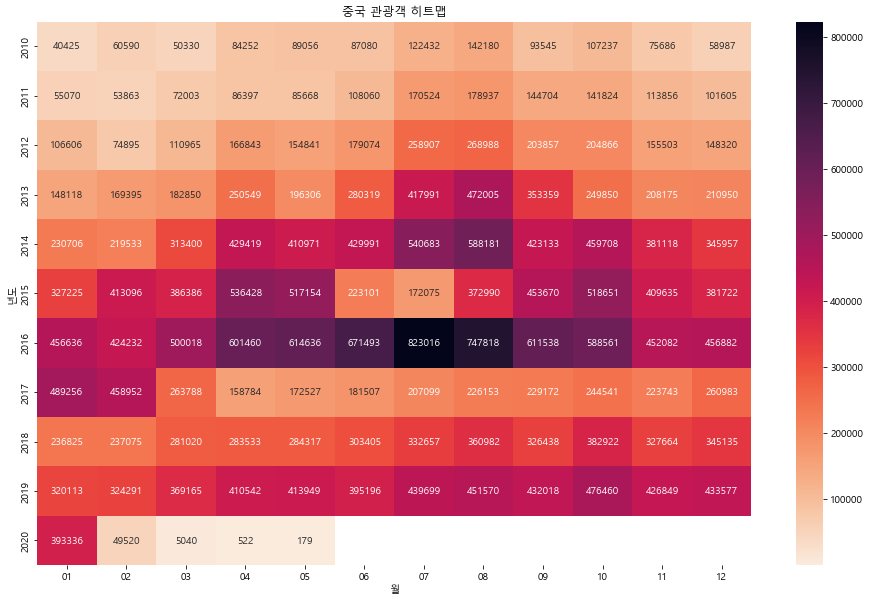

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot,annot=True,fmt='.0f',cmap='rocket_r')
plt.title('중국 관광객 히트맵')
plt.show()

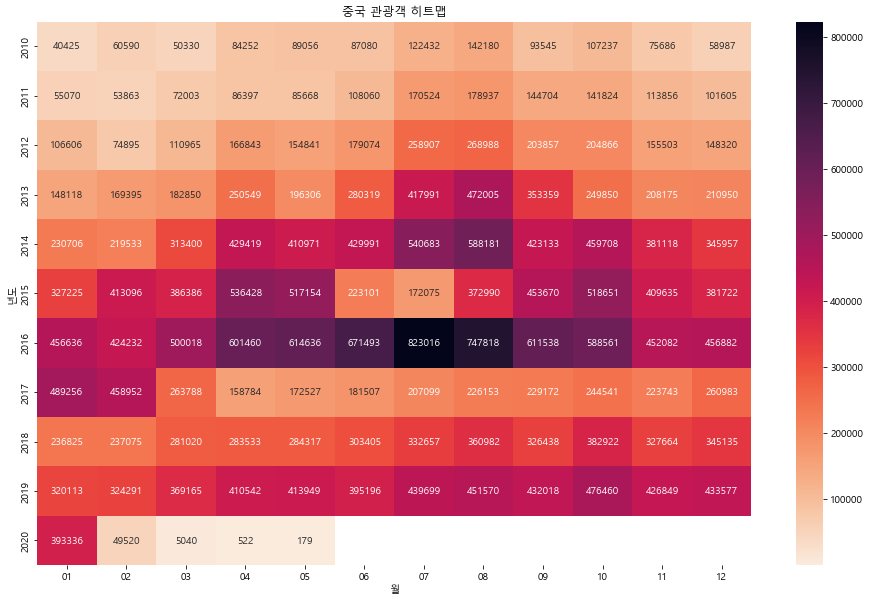

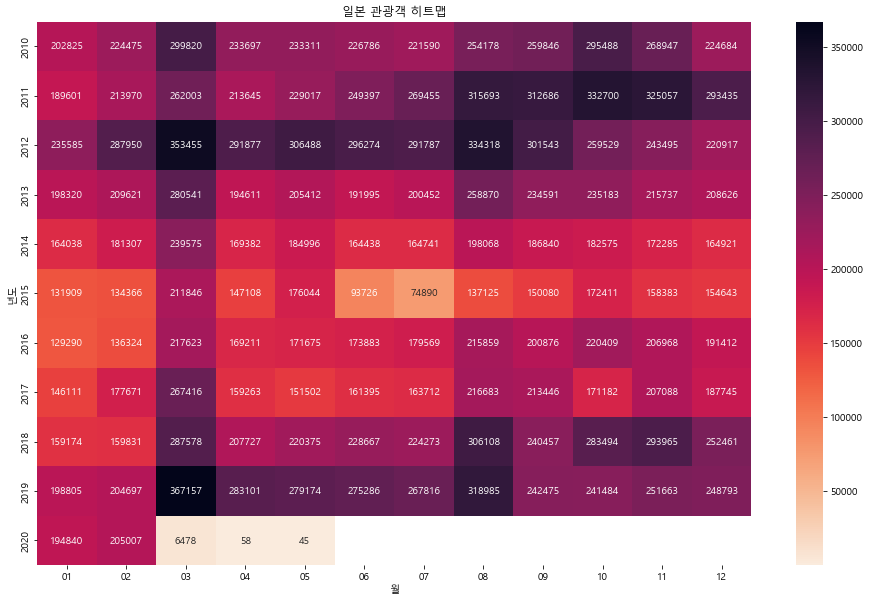

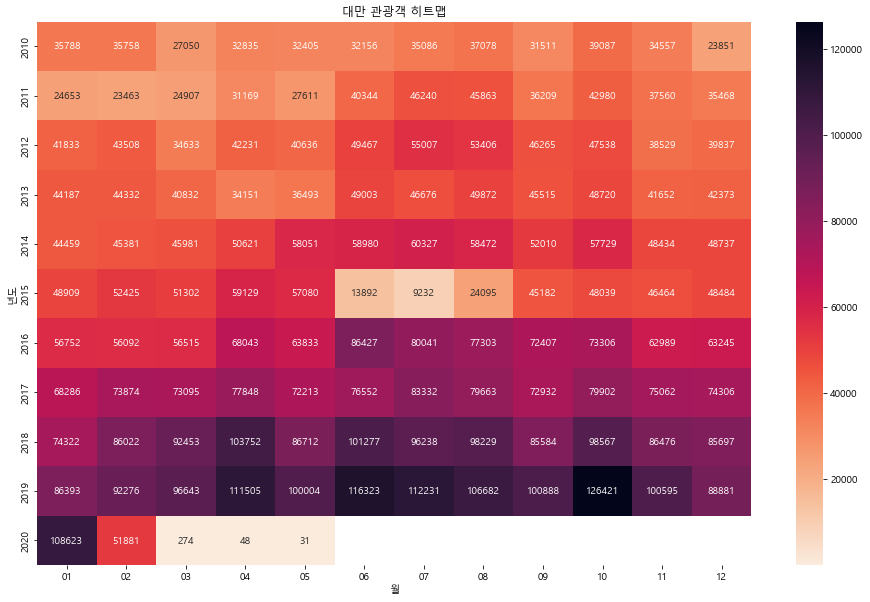

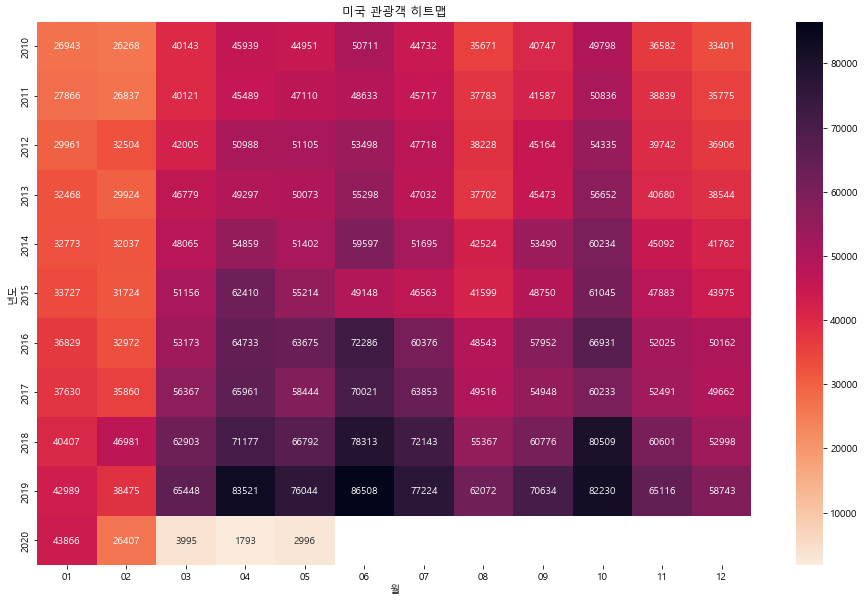

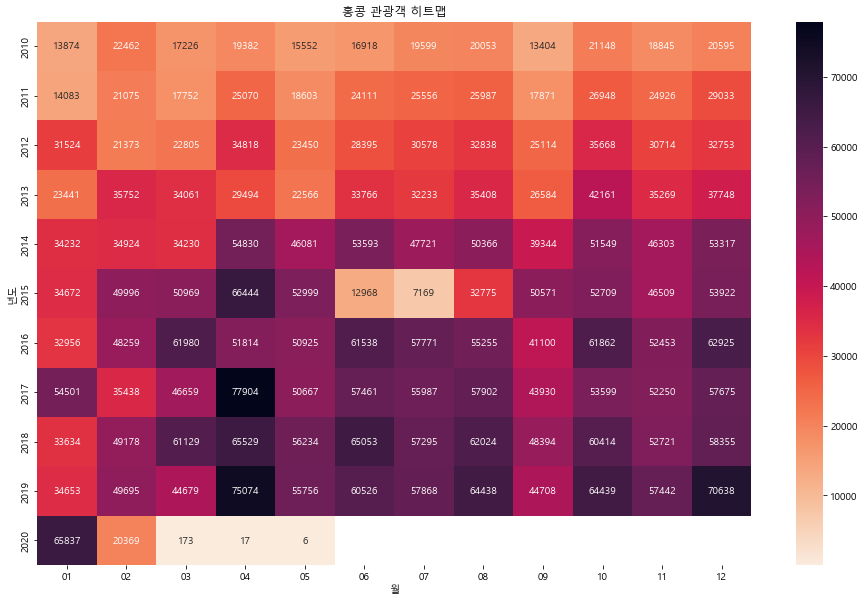

In [9]:
#관광객 상위 5개나라 히트맵 그리기
cnt_list=['중국','일본','대만','미국','홍콩']
for cnt in cnt_list:
    condition=(df['국적']==cnt)
    df_filter=df[condition]

    df_pivot=df_filter.pivot_table(values='관광',
                              index='년도',
                              columns='월')
    plt.figure(figsize=(16,10))
    sns.heatmap(df_pivot,annot=True,fmt='.0f',cmap='rocket_r')
    plt.title('{} 관광객 히트맵'.format(cnt))
    plt.show()